In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [109]:
sns.set_style('dark')
sns.set(rc = {
      'axes.edgecolor': '#242424'
    , 'axes.facecolor': '#242424'
    , 'axes.grid': False
    , 'axes.labelcolor': '#ffffff'
    , 'axes.labelsize': 18
    , 'axes.titlesize': 30
    , 'figure.facecolor': '#242424'
    , 'figure.figsize': (20, 15)
    , 'text.color': '#ffffff'
    , 'xtick.color': '#ffffff'
    , 'ytick.color': '#ffffff'
})

In [46]:
def to_count_df(col: pd.Series) -> pd.DataFrame:
    return col.rename_axis('letter').reset_index(name = 'count')

In [89]:
def plot_count(df: pd.DataFrame, title: str) -> None:
    count_mean = np.mean(df['count'])
    count_top = df['count'].max() * 0.75
    
    palette = {row['letter']: '#6ba866' 
        if count_top <= row['count'] 
        else '#c9b457' 
        if count_mean <= row['count'] 
        else '#787c81' 
        for _, row in df.iterrows()
    }
       
    sns.barplot(
          x = 'letter'
        , y = 'count'
        , data = df
        , palette = palette
    )
    plt.title(title)
    plt.show()

In [4]:
DF_WORDS = pd.read_csv('D:/_DataSci/Projects/Wordle/5_letters.csv')
DF_WORDS.shape

(2499, 5)

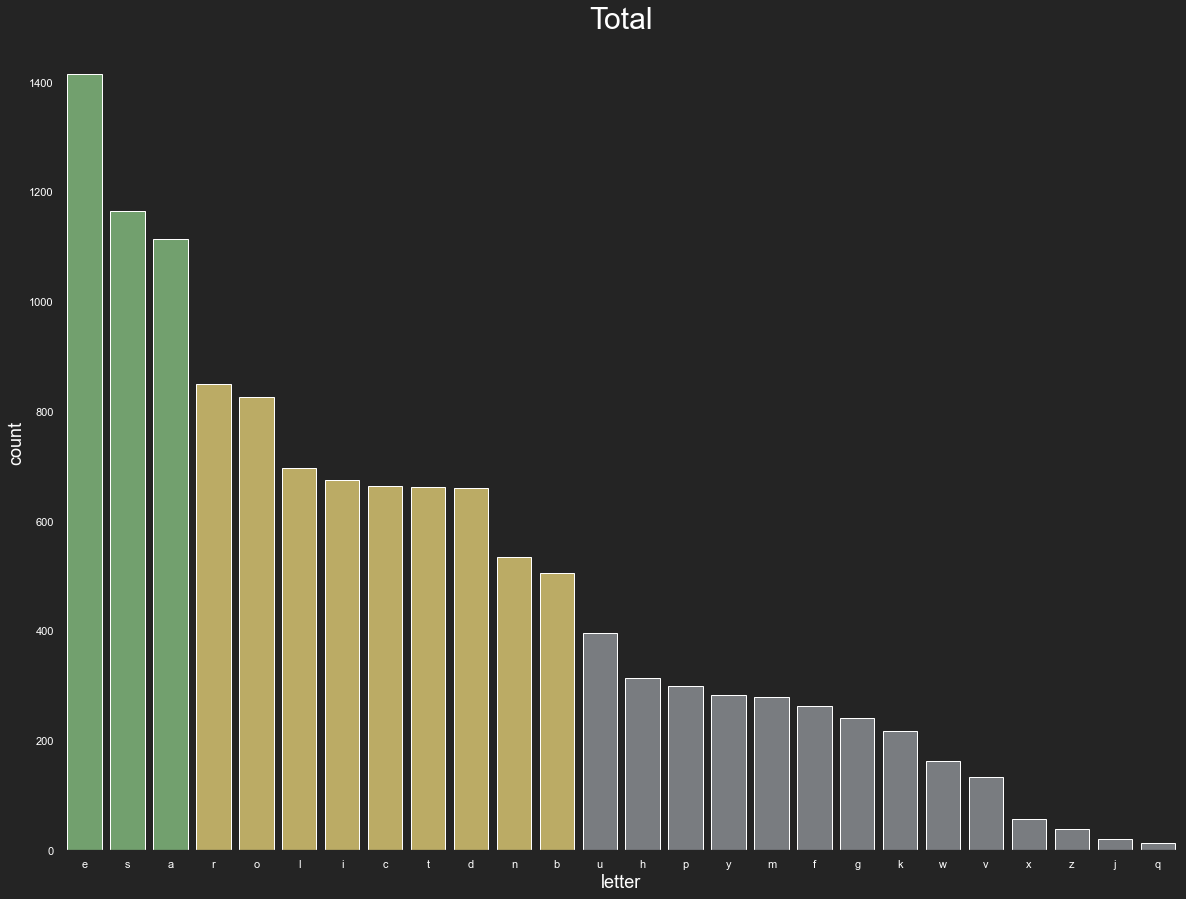

In [110]:
DF_TOTAL = pd.DataFrame(
      zip(*np.unique(DF_WORDS.to_numpy().flatten(), return_counts = True))
    , columns = ['letter', 'count']
).sort_values(by = 'count', ascending = False)

plot_count(DF_TOTAL, 'Total')

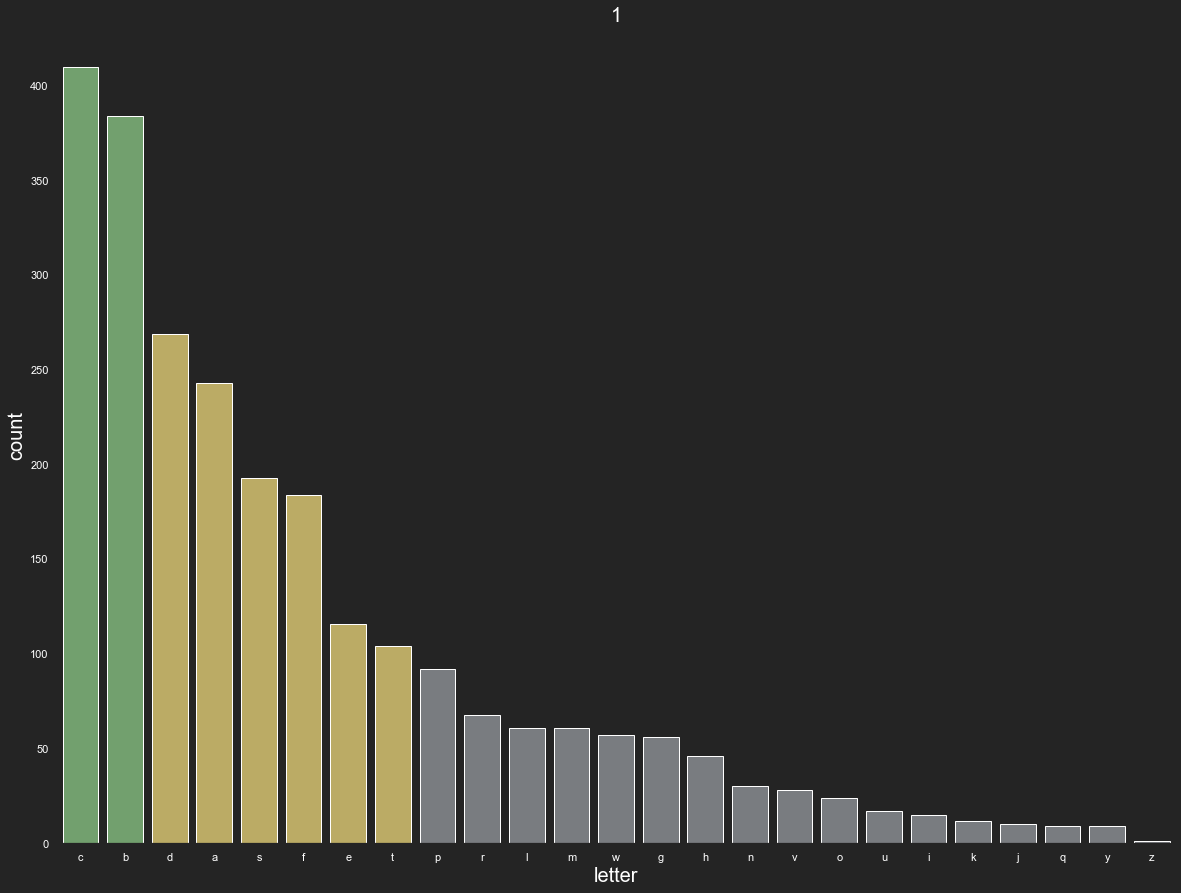

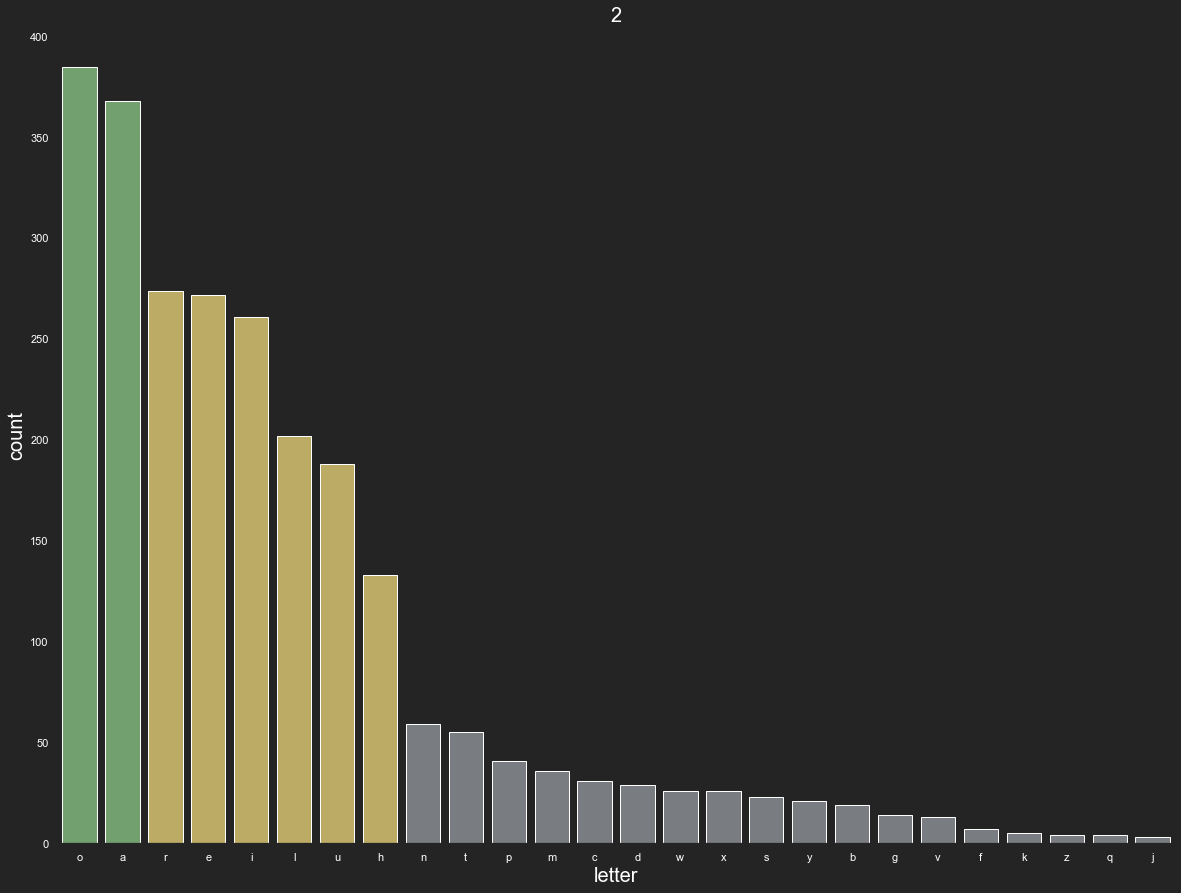

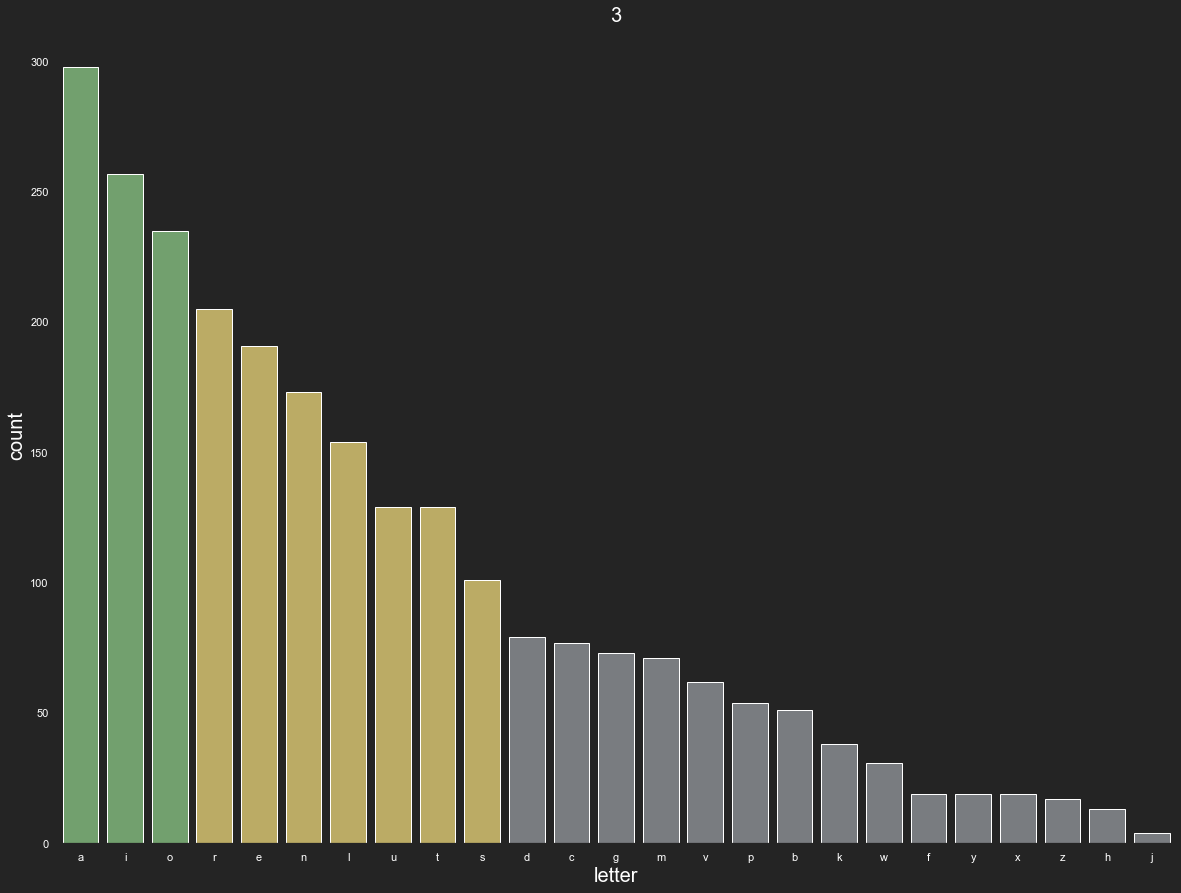

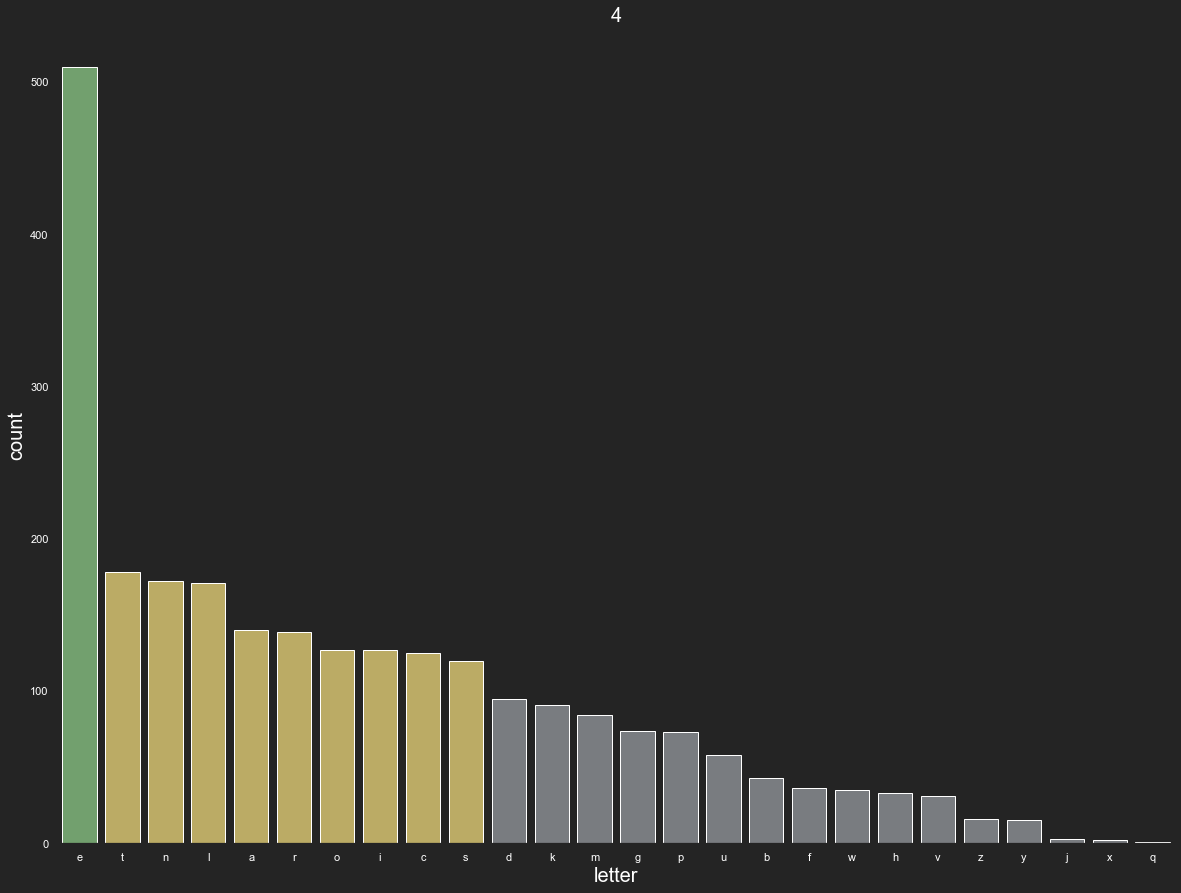

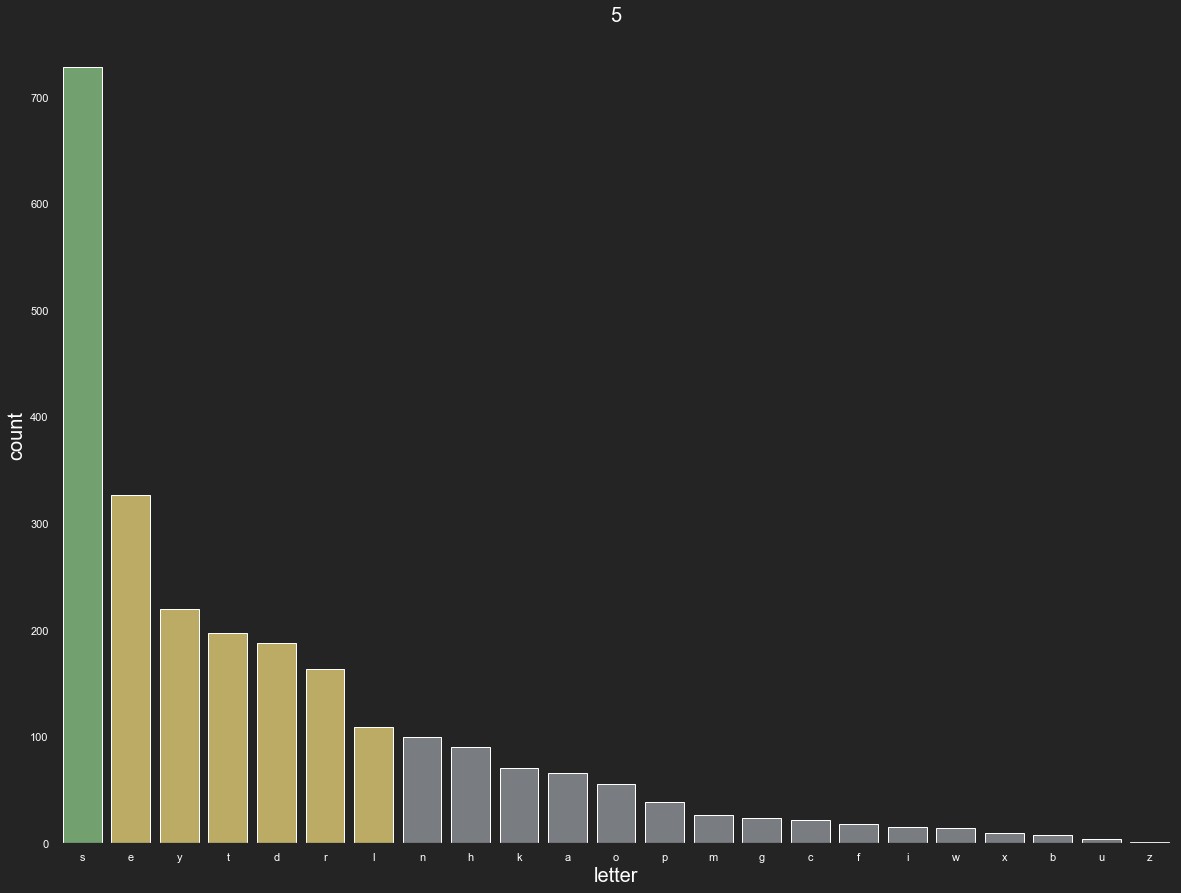

In [104]:
for col in DF_WORDS:
    plot_count(to_count_df(DF_WORDS[col].value_counts()), col)